# <span style="color:blue">**Capítulo 2**</span>
## <font color=blue size=8> Reducción de Dimensionalidad </font>
### <font color=blue> Creación de Conjuntos de Datos de Entrenamiento Manejables </font>

Después de depurar tu conjunto de datos, realizar el análisis exploratorio (EDA) y preparar el conjunto de datos para aprendizaje automático, tu siguiente tarea es reducir sus dimensiones. En aprendizaje automático, tanto el tamaño como las dimensiones del conjunto de datos son consideraciones igualmente importantes al entrenar el algoritmo. Incluso si tu conjunto de datos tiene dimensiones manejables, aún deberías eliminar algunas dimensiones, como columnas correlacionadas, para mejorar el aprendizaje de los algoritmos. La reducción de dimensionalidad es clave para crear conjuntos de entrenamiento manejables, y eso es lo que aprenderás en este capítulo.

## En Pocas Palabras:

Una máquina aprenderá mejor con más datos; sin embargo, tener demasiados datos también puede ser problemático. Estos son algunos aspectos que deberías considerar:

• Un conjunto de datos con muchas características es difícil de explorar.
• Es extremadamente difícil visualizar datos en un espacio de más de tres dimensiones.
• Conjuntos de datos más grandes implican mayores tiempos de entrenamiento y más recursos.
• Las características correlacionadas añaden una carga adicional al entrenamiento.

Teniendo en cuenta todos estos factores, preferimos reducir las dimensiones del conjunto de datos sin perder la información esencial. A esto lo llamamos reducción de dimensionalidad.
Primero, déjame explicar por qué necesitamos reducir las dimensiones de un conjunto de datos.

## ¿Por Qué Reducir la Dimensionalidad?

Alguien podría decir que tener más características para la inferencia es mejor que contar con solo unas cuantas. En aprendizaje automático, esto no es cierto. Tener muchas características, de hecho, incrementa los problemas para un científico de datos. A esto lo llamamos la “maldición de la dimensionalidad”. Un conjunto de datos de alta dimensionalidad se considera una maldición para un científico de datos. ¿Por qué?

Mencionaré algunos de los desafíos que enfrenta un científico de datos al trabajar con conjuntos de datos de alta dimensionalidad:
• Un conjunto de datos grande probablemente contendrá muchos valores nulos, por lo que es necesario realizar una limpieza exhaustiva de los datos. Esto implica eliminar esas columnas o imputarlas con valores apropiados.
• Ciertas columnas pueden estar altamente correlacionadas. Basta con conservar una de ellas.
• Existe una alta probabilidad de sobreajustar el modelo.
• El entrenamiento sería computacionalmente costoso.

Ante estos problemas, debemos considerar formas de reducir las dimensiones; es decir, usar únicamente aquellas características realmente significativas en el desarrollo del modelo. Por ejemplo, tener dos columnas como fecha de nacimiento y edad carece de sentido, ya que ambas aportan la misma información al modelo. Por lo tanto, podemos eliminar una sin comprometer la capacidad del modelo para inferir datos no vistos. Un campo de identificación (id) en el conjunto de datos es completamente redundante para el aprendizaje automático y debe eliminarse.

Realizar inspecciones manuales de este tipo para reducir las dimensiones sería prácticamente imposible; por ello, se han desarrollado numerosas técnicas para la reducción de dimensionalidad de forma programática.

## Técnicas de Reducción de Dimensionalidad

La reducción de dimensionalidad consiste esencialmente en disminuir el número de características de tu conjunto de datos. Existen dos enfoques para lograrlo: el primero consiste en conservar únicamente las características más importantes eliminando las no deseadas, y el segundo en combinar ciertas características para reducir el conteo total.

Se ha trabajado mucho en el campo de la reducción de dimensionalidad, y se han ideado varias técnicas para ello. Es necesario conocer todas estas técnicas, ya que una sola puede no cumplir por completo nuestro objetivo; la mayoría de las veces será necesario aplicar varias técnicas en un orden determinado para alcanzar el resultado deseado. A continuación, se discutirán las siguientes técnicas. Aunque la lista no es completamente exhaustiva, sí es bastante amplia:

• Columnas con valores faltantes
• Filtrado de columnas basado en la varianza
• Filtrado de columnas altamente correlacionadas
• Random forest
• Eliminación hacia atrás (backward elimination)
• Selección progresiva de características (forward feature selection)
• Análisis factorial
• Análisis de componentes principales (PCA)
• Análisis de componentes independientes (ICA)
• Mapeo isométrico (Isomap)
• t-distributed stochastic neighbor embedding (t-SNE)
• Uniform Manifold Approximation and Projection (UMAP)
• Descomposición en valores singulares (SVD)
• Análisis discriminante lineal (LDA)

Para ilustrar estas técnicas, he creado un proyecto sencillo que se describe a continuación.

## Proyecto Dataset

El proyecto se basa en un [conjunto de datos](https://github.com/IBM/Predict-loan-eligibility-using-IBM-Watson-Studio) sobre elegibilidad de préstamos. Contiene 12 características en función de las cuales se decide la elegibilidad del cliente para la aprobación de un préstamo. La información del conjunto de datos se muestra en la Figura 2.1.

In [322]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [323]:
df = pd.read_csv("Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.1</p>

<p>Estructura del conjunto de datos de elegibilidad de préstamos.</p>

El conjunto de datos está diseñado para un problema de clasificación. La variable objetivo es _Loan_Status_, que puede ser “aprobado” o “rechazado”. El estado del préstamo depende de los valores de otros 11 campos (el campo _Loan_ID_ no es útil para nosotros), que constituyen las características para nuestra experimentación con reducción de dimensionalidad. Trataremos de reducir estas dimensiones y observar su impacto sobre nuestra variable objetivo.

## Columnas con valores faltantes

En un conjunto de datos grande, es posible que encuentres algunas columnas con muchos valores faltantes. Al realizar un conteo de valores nulos en cada columna, podrás identificar cuáles contienen valores faltantes. Puedes optar por imputar esos valores o eliminar las columnas, bajo la suposición de que no afectarán el rendimiento del modelo.

Para eliminar columnas específicas, se establece un umbral determinado; por ejemplo, si una columna tiene más del 20 % de valores faltantes, se elimina. Esto se puede hacer en Python con un código sencillo como el siguiente:

In [324]:
df.isnull().sum()/len(df)

a = df.isnull().sum()/len(df)
variables = df.columns[:-1]
variable = []
for i in range(0,len(df.columns[:-1])):
    if a[i]>0.03: # umbral en 3%
        variable.append(variables[i])
print(variable)


['Self_Employed', 'LoanAmount', 'Credit_History']


Como puedes ver, las columnas _Self_Employed_, _LoanAmount_ y _Credit_History_ se eliminan porque el número de valores faltantes en estas columnas supera el límite de umbral que establecimos.

En algunas situaciones, aún podrías decidir conservar columnas con valores faltantes. En ese caso, será necesario imputar los valores faltantes usando la moda o la mediana de la columna correspondiente.

En nuestro conjunto de datos, consideremos las tres columnas _LoanAmount_, _Loan_Amount_Term_ y _Credit_History_, que tienen valores faltantes. Vamos a graficar los histogramas de la distribución de datos para estas tres columnas, como se muestra en la Figura 2.2.

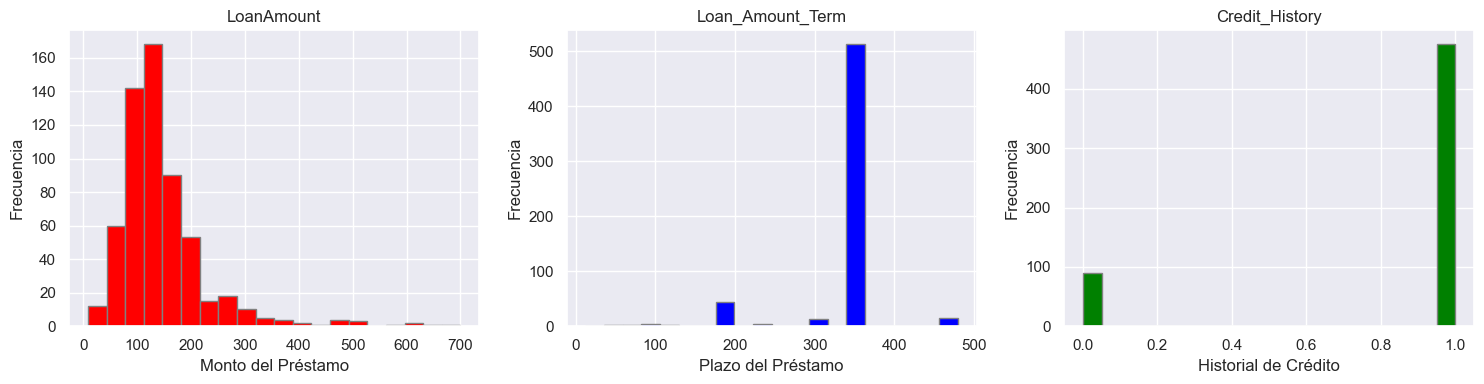

In [325]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograma de LoanAmount
axes[0].hist(df['LoanAmount'].dropna(), bins=20, color='red', edgecolor='gray', zorder=2)
axes[0].set_title('LoanAmount')
axes[0].set_xlabel('Monto del Préstamo')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, zorder=1)

# Histograma de Loan_Amount_Term
axes[1].hist(df['Loan_Amount_Term'].dropna(), bins=20, color='blue', edgecolor='gray', zorder=2)
axes[1].set_title('Loan_Amount_Term')
axes[1].set_xlabel('Plazo del Préstamo')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, zorder=1)

# Histograma de Credit_History
axes[2].hist(df['Credit_History'].dropna(), bins=20, color='green', edgecolor='gray', zorder=2)
axes[2].set_title('Credit_History')
axes[2].set_xlabel('Historial de Crédito')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, zorder=1)

plt.tight_layout()
plt.show()




<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.2</p>

<p>Histogramas de algunas características numéricas.</p>

Al observar los histogramas, se nota que _Loan_Amount_Term_ y _Credit_History_ tienen distribuciones discretas, por lo que imputaremos la moda en los valores faltantes de estas columnas. Para LoanAmount, utilizaremos la mediana para los valores faltantes. 
A continuación, se muestra esto en el fragmento de código:

In [326]:
df['LoanAmount'].fillna(
    df['LoanAmount'].median(),
    inplace=True)
df['Loan_Amount_Term'].fillna(
    df['Loan_Amount_Term'].mode()[0],
    inplace=True)
df['Credit_History'].fillna(
    df['Credit_History'].mode()[0],
    inplace=True)

A continuación, comprobaremos la varianza en cada columna

## Filtrado de columnas en función de la varianza

Las columnas que muestran baja varianza aportan poco al entrenamiento del modelo y pueden eliminarse de manera segura. Para verificar la varianza de las columnas, debemos asegurarnos de que todas sean numéricas. Para ello, primero convertiremos nuestras columnas categóricas en columnas numéricas. Después de esto, puedes comprobar la varianza de cada columna llamando al método _var_ sobre el DataFrame.

In [327]:
df = df.copy()
columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'Loan_ID']

for col in columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

variances = df.drop(columns=['Loan_ID']).var()
print(variances)


Gender               1.778751e-01
Married              2.351972e-01
Dependents           1.255589e+00
Education            1.708902e-01
Self_Employed        2.859435e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.151048e+03
Credit_History       1.241425e-01
Property_Area        6.201280e-01
Loan_Status          2.152707e-01
dtype: float64


Como puedes observar, la varianza de la columna _Credit_History_ es muy baja, por lo que podemos eliminarla de manera segura. En conjuntos de datos con un gran número de columnas, este tipo de revisión manual de la varianza no es práctico. Por ello, se puede establecer un umbral para filtrar automáticamente las columnas con varianza muy baja, de manera similar a cómo se detectaron las columnas con muchos valores faltantes.

In [328]:
# Omitiendo 'Loan_ID' and 'Loan_Status'

numeric = df[df.columns[1:-1]]

var = numeric.var()

numeric_cols = numeric.columns

variable = []
for i in range(0, len(numeric_cols)):
    if var[i]>=10:
        variable.append(numeric_cols[i])
variable

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Como puedes ver, las cuatro columnas listadas anteriormente muestran una alta varianza, por lo que son significativas para el entrenamiento del modelo. De manera similar, puedes filtrar las columnas que tengan baja varianza y que, por lo tanto, sean irrelevantes para nuestro análisis.

## Filtrado de columnas altamente correlacionadas

Cuando dos características contienen información aproximadamente similar, como fecha de nacimiento y edad, decimos que están altamente correlacionadas. Tener columnas correlacionadas aumenta la complejidad del algoritmo y, en ocasiones, puede llevar al sobreajuste.

Para examinar las correlaciones entre las distintas características, se puede graficar la matriz de correlación. La Figura 2.3 muestra dicha matriz para nuestro conjunto de datos.

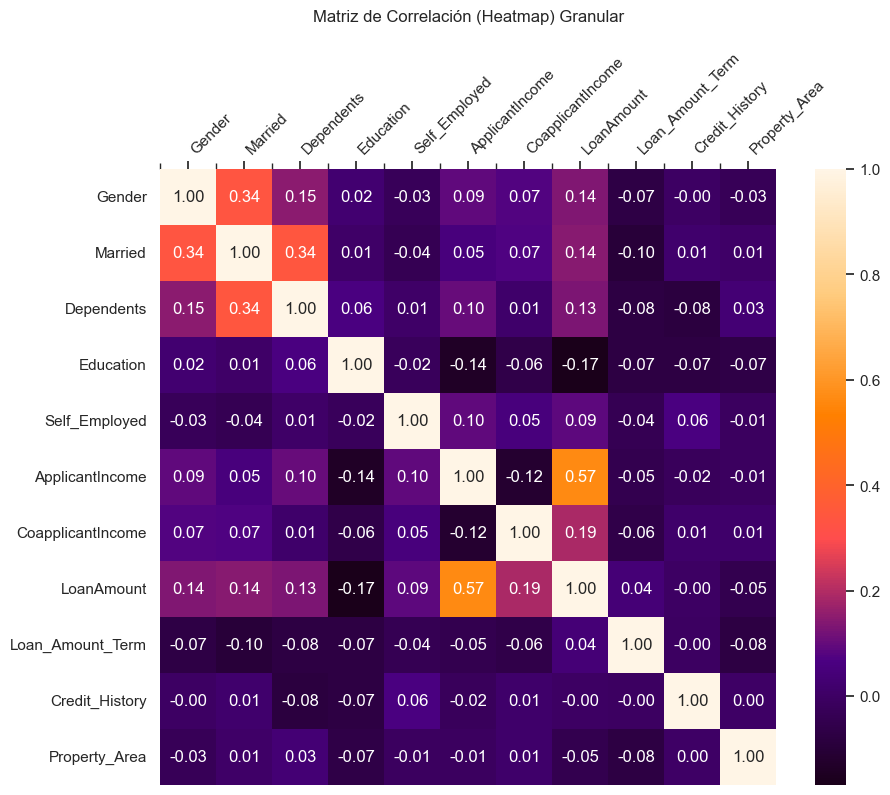

In [329]:
feature_cols = df.columns[1:-1]
corr_matrix = df[feature_cols].corr()

colors = ["#1a001a", "#4b0082", "#ff4d4d", "#ff8000", "#ffcc80", "#fff5e6"]
cmap = mcolors.LinearSegmentedColormap.from_list("granular_cmap", colors)

plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    cbar=True,
    square=True,
    linewidths=0,
    xticklabels=True,
    yticklabels=True
)

ax.set_xticks(np.arange(corr_matrix.shape[1]), minor=True)
ax.set_yticks(np.arange(corr_matrix.shape[0]), minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)

# Mover labels del eje x arriba
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)

plt.title('Matriz de Correlación (Heatmap) Granular', pad=20)
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.3</p>

<p>Matriz de Correlaciones.</p>

Este tipo de gráfico también se conoce como mapa de calor (heat map). Si los valores fuera de la diagonal superan un cierto umbral, una de las variables correspondientes puede eliminarse de manera segura.

También puedes realizar la comprobación de correlación a través de un código de programa como este:

In [330]:
feature_cols = df.columns[1:-1]
corr_values = df[feature_cols].corr()

indexes = np.tril_indices_from(corr_values)

for coord in zip(*indexes):
    corr_values.iloc[coord[0], coord[1]] = np.nan

corr_values = (corr_values
    .stack()
    .to_frame()
    .reset_index()
    .rename(columns={'level_0':'feature1',
        'level_1':'feature2',
        0:'correlation'}))

corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

from IPython.display import display, HTML
display(HTML('<div style="height:200px; overflow:auto">' + corr_values.to_html() + '</div>'))

,feature1,feature2,correlation,abs_correlation
0,Gender,Married,0.336094,0.336094
1,Gender,Dependents,0.149674,0.149674
2,Gender,Education,0.024382,0.024382
3,Gender,Self_Employed,-0.025022,0.025022
4,Gender,ApplicantIncome,0.094472,0.094472
5,Gender,CoapplicantIncome,0.073308,0.073308
6,Gender,LoanAmount,0.135505,0.135505
7,Gender,Loan_Amount_Term,-0.068522,0.068522
8,Gender,Credit_History,-0.003844,0.003844
9,Gender,Property_Area,-0.030903,0.030903


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.4</p>

<p>Correlaciones en nuestro conjunto de datos.</p>

También puedes generar un gráfico de los valores de correlación absoluta, como se muestra en la Figura 2.5.

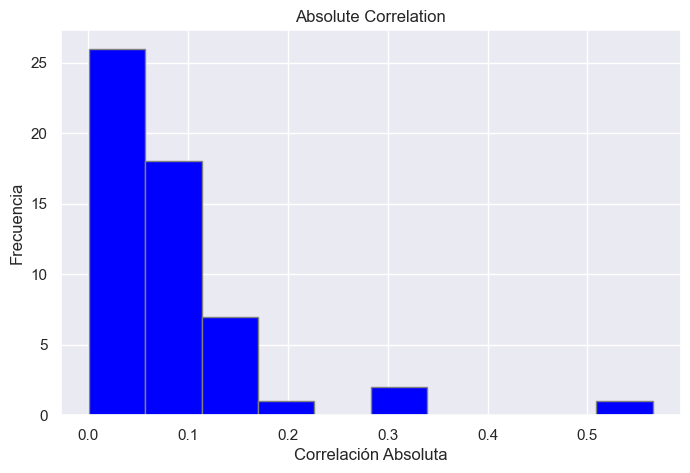

In [331]:
plt.figure(figsize=(8,5))
plt.hist(corr_values['abs_correlation'], bins=10, color='blue', edgecolor='gray', zorder=2)
plt.title('Absolute Correlation')
plt.xlabel('Correlación Absoluta')
plt.ylabel('Frecuencia')
plt.grid(True, zorder=1)
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.5</p>

<p>Histograma de correlaciones absolutas.</p>

Luego, puedes obtener una lista de pares de columnas cuya correlación absoluta supere un determinado umbral. Esta información se utiliza para eliminar una de las columnas correlacionadas. Además, puedes aplicar filtros para aislar solo los pares de columnas cuya correlación exceda un valor específico.

El resultado se muestra en la Figura 2.6.

In [332]:
corr_values.sort_values(
'correlation', ascending=False).query(
'abs_correlation>0.5')

,feature1,feature2,correlation,abs_correlation
41,ApplicantIncome,LoanAmount,0.565181,0.565181


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.6</p>

<p>Columnas que tienen una correlación absoluta mayor a 0.5.</p>

Como se puede observar, el ingreso (ApplicantIncome) y el monto del préstamo (LoanAmount) están relativamente altamente correlacionados, por lo que se puede utilizar solo uno de los dos. En conjuntos de datos muy grandes, el umbral para considerar una correlación alta puede situarse alrededor de 0.90 o 0.95.

Hasta ahora, has estudiado técnicas de selección de características basadas en la inspección manual de los conjuntos de datos. A continuación, te mostraré una técnica que reduce en gran medida este proceso manual.

## Bosque Aleatorio (Random Forest)

El bosque aleatorio es muy útil para la selección de características. El algoritmo genera un gráfico de importancia de características, como se muestra en la Figura 2.7. Este gráfico ayuda a eliminar características que tienen un bajo impacto en el desempeño del modelo.

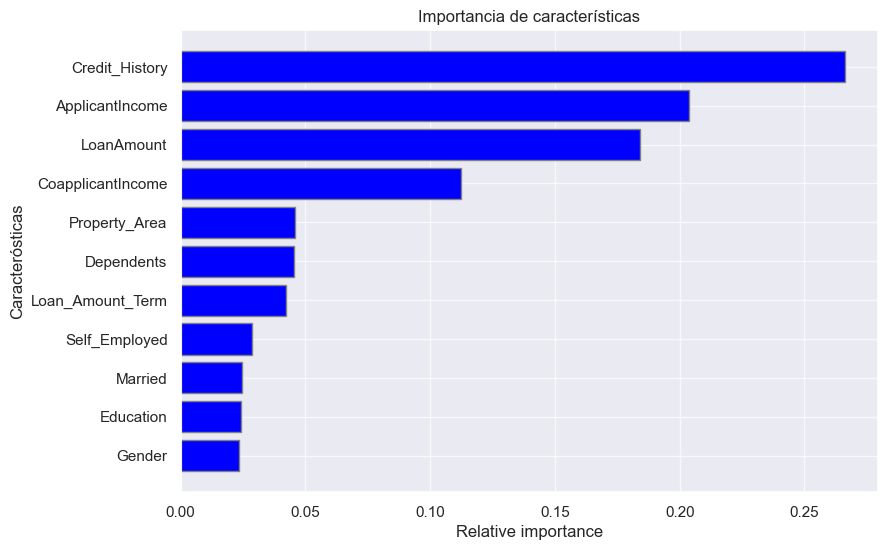

In [333]:
df_rf = df.copy()
columns = [col for col in df_rf.select_dtypes(include=['object']).columns if col != 'Loan_ID']
for col in columns:
    df_rf[col] = LabelEncoder().fit_transform(df_rf[col].astype(str))

X = df_rf.drop(columns=['Loan_ID', 'Loan_Status'])
y = df_rf['Loan_Status']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(9,6))
plt.barh(importances.index, importances.values, 
          color='blue', edgecolor='gray', zorder=2)
plt.gca().invert_yaxis()

plt.xlabel("Relative importance")
plt.ylabel("Caracterósticas")
plt.grid(alpha=0.7, zorder=1)
plt.title("Importancia de características")
plt.show()






<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.7</p>

<p>Gráfico de importancia de las características generadas por un bosque aleatorio</p>

Observando el gráfico, se pueden descartar características de baja importancia, como _Education_, _Gender_, _Married_ y _Self_Employed_.

El bosque aleatorio se utiliza ampliamente en ingeniería de características debido a su paquete integrado de importancia de características. El RandomForestRegressor calcula un puntaje basado en el impacto de cada característica sobre la variable objetivo. La representación visual de estos puntajes facilita a un científico de datos crear una lista final de características.

Por ejemplo, a partir de la figura, un científico de datos podría seleccionar únicamente las primeras cuatro características, ya que tienen el mayor impacto en la variable objetivo para la construcción del modelo.

## Eliminación 'Hacia Atrás'

En la eliminación hacia atrás, entrenamos el modelo con las n variables y luego vamos eliminando, una por una, la característica que tenga el menor efecto sobre el rendimiento del modelo, hasta que no quede ninguna característica por eliminar. Los pasos algorítmicos son:

1. Entrenar el modelo con el conjunto de datos completo.

2. Eliminar una característica al azar y volver a entrenar.

3. Repetir el paso 2 para todas las n – 1 características.

4. Eliminar del conjunto la característica que tenga la menor influencia en el rendimiento del modelo.

5. Repetir los pasos 2–4 hasta que no queden más características.

Usamos el algoritmo _sklearn.feature_selection.RFE_ para implementar la eliminación hacia atrás. RFE elimina de forma recursiva las características de menor importancia. Determina la relevancia de cada característica a través de un atributo específico. Un parámetro de RFE es un estimador de aprendizaje supervisado, como la regresión logística. El estimador proporciona información sobre la importancia de cada característica. Repetimos el proceso hasta alcanzar el número de características deseado.

Supongamos que queremos obtener las cuatro características más significativas de nuestro conjunto de datos. Lo hacemos con el siguiente fragmento de código:

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

estimator = LogisticRegression(max_iter=150)

selector = RFE(estimator,
    n_features_to_select = 4,
    step = 1)
selector.fit(X, y)

X_selected = selector.transform(X)

Observa que usamos la regresión logística como estimador en el código anterior.
Una vez que RFE finaliza por completo, obtendrás la lista de características seleccionadas verificando el valor del atributo _support__.

In [335]:
print('Cracterísticas de Soporte')
print(selector.support_)

Cracterísticas de Soporte
[ True  True False  True False False False False False  True False]


Según este resultado, la primera, segunda, cuarta y décima características, que están marcadas como _True_, son las más significativas. También puedes obtener el ranking de todas las características examinando el atributo _ranking__ del selector RFE, donde un valor más bajo indica mayor importancia.

In [336]:
print('Ranking de Caracterpisticas por Importancia')
print(selector.ranking_)


Ranking de Caracterpisticas por Importancia
[1 1 4 1 3 8 7 6 5 1 2]


Un valor de ranking igual a 1 indica mayor importancia. Por lo tanto, las características en los índices 0, 1, 3 y 9 son las más significativas en nuestro caso. Puedes imprimir los nombres de estas cuatro características más importantes escribiendo una pequeña función como esta:

In [337]:
def get_top_features(selector, X):
    rank_1 = []
    for i in range(len(selector.ranking_)):
        if selector.ranking_[i] == 1:
            rank_1.append(i)
    return X.iloc[:, rank_1].columns

top_features = get_top_features(selector, X)
print('Las cuatro características más informativas son:')
print(top_features)


Las cuatro características más informativas son:
Index(['Gender', 'Married', 'Education', 'Credit_History'], dtype='object')


Se observa que _Gender_, _Married_, _Education_ y _Credit_History_ son las cuatro características más significativas para el entrenamiento de nuestro modelo.

## Selección de Características hacia Adelante

La selección de características hacia adelante sigue el proceso exactamente opuesto al de la eliminación hacia atrás. Comenzamos con la característica más importante y vamos agregando otras de manera recursiva hasta que no se observe una mejora significativa en el rendimiento del modelo. Usamos la función _SelectKBest_ como se muestra a continuación para seleccionar las siete características principales:

In [338]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_selected = SelectKBest(f_classif, k=7).fit(X, y)

El parámetro _f_classif_ de la función _SelectKBest_ es una función que recibe dos arreglos, *X* e *Y*, y devuelve un par de arreglos (scores, p-values) o solo un arreglo de puntajes. Esta función solo funciona para tareas de clasificación. Podemos transformar los valores p (p-values) en puntajes (scores) con la siguiente instrucción:

In [339]:
scores = -np.log10(X_selected.pvalues_)

Luego, puedes graficar la importancia de las características, como se muestra en la Figura 2.8.

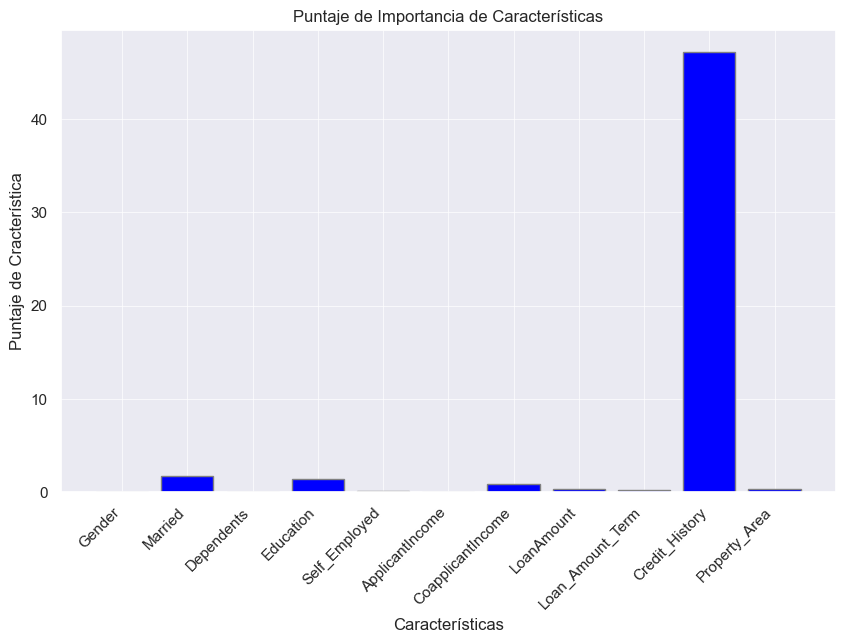

In [340]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, scores, color='blue', edgecolor='gray', zorder=2)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Características')
plt.ylabel('Puntaje de Cracterística')
plt.title('Puntaje de Importancia de Características')

plt.grid(linewidth=0.5, zorder=1)

plt.show()




<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.7</p>

<p>Puntajes de características para todas las características</p>

Al igual que antes, puedes obtener la lista de las principales características escribiendo una pequeña función, por ejemplo:

In [341]:
ind = np.argpartition(scores, -7)[-7:]

print('The seven best features are:')
print(X.iloc[:,ind].columns)

The seven best features are:
Index(['Loan_Amount_Term', 'Property_Area', 'LoanAmount', 'CoapplicantIncome',
       'Education', 'Married', 'Credit_History'],
      dtype='object')


De nuevo, puedes ajustar el valor de *k* en la función _SelectKBest_ para obtener un mayor o menor número de características significativas, según tus necesidades.

## Análisis Factorial

En el análisis factorial, organizamos todas las características en grupos de manera que, dentro de un grupo, las características estén altamente correlacionadas entre sí, pero tengan baja correlación con las características de otros grupos. Por ejemplo, características como _ingresos_ y _gastos_ suelen estar fuertemente correlacionadas: las personas con mayores ingresos generalmente gastan más. Estas se agrupan en un factor.

Un término importante es el de valores propios (eigenvalues), que corresponde a la cantidad total de varianza que un componente puede explicar. Un factor con valor propio mayor que 1 explica más varianza, por lo que se seleccionan únicamente aquellos factores con valores propios superiores a 1.

Para mostrar el uso del análisis factorial, podemos usar el módulo de Python _factor_analyzer_, diseñado para análisis exploratorio y factorial (en inglés EFA). Este módulo realiza EFA utilizando mínimos residuales (en inglés MINRES), máxima verosimilitud (en inglés ML) o factor principal (en inglés PF).

In [342]:
# !pip install factor_analyzer

Puedes aplicar el FactorAnalyzer a tu dataset con un código similar al siguiente:

In [343]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,
    impute = "drop",
    n_factors=df.shape[1])
fa.fit(df)

FactorAnalyzer(impute='drop', n_factors=12, rotation=None, rotation_kwargs={})

Después de factorizar, obtén los valores propios.

In [344]:
ev,_ = fa.get_eigenvalues()


En la Fig. 2.9 se ve un gráfico de valores propios versus factor, también llamado “Scree Plot”.

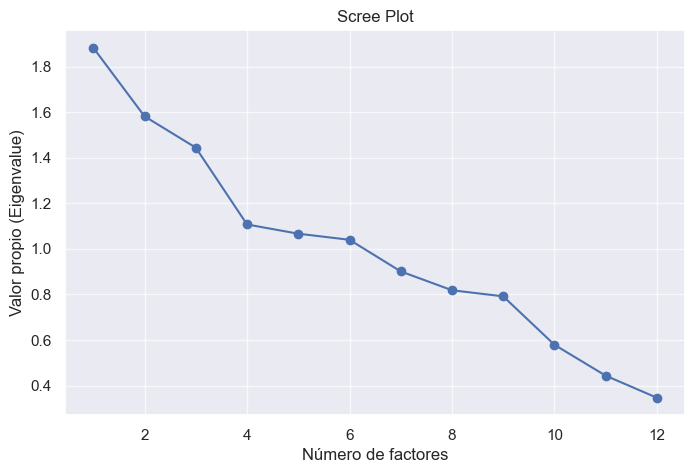

In [345]:

fa = FactorAnalyzer(rotation=None)
fa.fit(X) 

plt.figure(figsize=(8,5))
plt.plot(range(1, len(ev)+1), ev, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Valor propio (Eigenvalue)')
plt.grid(alpha=0.7)
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.9</p>

<p>Scree Plot del análisis factorial</p>

Puedes observar que hay seis componentes que tienen valor propio > 1. Usarás estos componentes para entrenar tu modelo.

## Análisis de Componentes Principales

El análisis de componentes principales (por sus siglas en inglés, PCA) es un proceso estadístico muy conocido utilizado tanto en EDA como en la construcción de modelos predictivos. Convierte características correlacionadas en un conjunto de características linealmente no correlacionadas mediante transformaciones ortogonales. Las nuevas características transformadas se llaman componentes principales.

Estas componentes principales son los vectores propios (eigenvectors) de la matriz de covarianza construida a partir del dataset. El PCA está estrechamente relacionado con el análisis factorial que vimos anteriormente y es el más simple de los análisis multivariantes basados en vectores propios.

El PCA tiene muchas aplicaciones prácticas, como:

Procesamiento de imágenes

Motores de recomendación de películas

Optimización de asignación de energía
y otros campos.

En EDA, visualizar datos en más de tres dimensiones es difícil. PCA permite reducir un dataset multidimensional a dos o tres dimensiones mientras se preserva la mayor parte de la variación de los datos, lo que facilita representarlos en gráficos 2D o 3D. Para la construcción de modelos predictivos, PCA puede reducir un dataset de alta dimensión (por ejemplo, 100 dimensiones) a un número menor de dimensiones (por ejemplo, 30) sin perder información vital y sin sacrificar la varianza importante de los datos.

Ahora te mostraré cómo usar PCA en nuestro conjunto de datos de préstamos que has utilizado en todas las técnicas anteriores. Usaré la implementación de PCA y kernel PCA de sklearn. El siguiente fragmento de código muestra cómo se aplica:

In [346]:
from sklearn.decomposition import PCA, KernelPCA

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf',
    gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

Después de crear los componentes principales, puedes visualizarlos usando un gráfico de dispersión. Esto se muestra en la Figura 2.10.

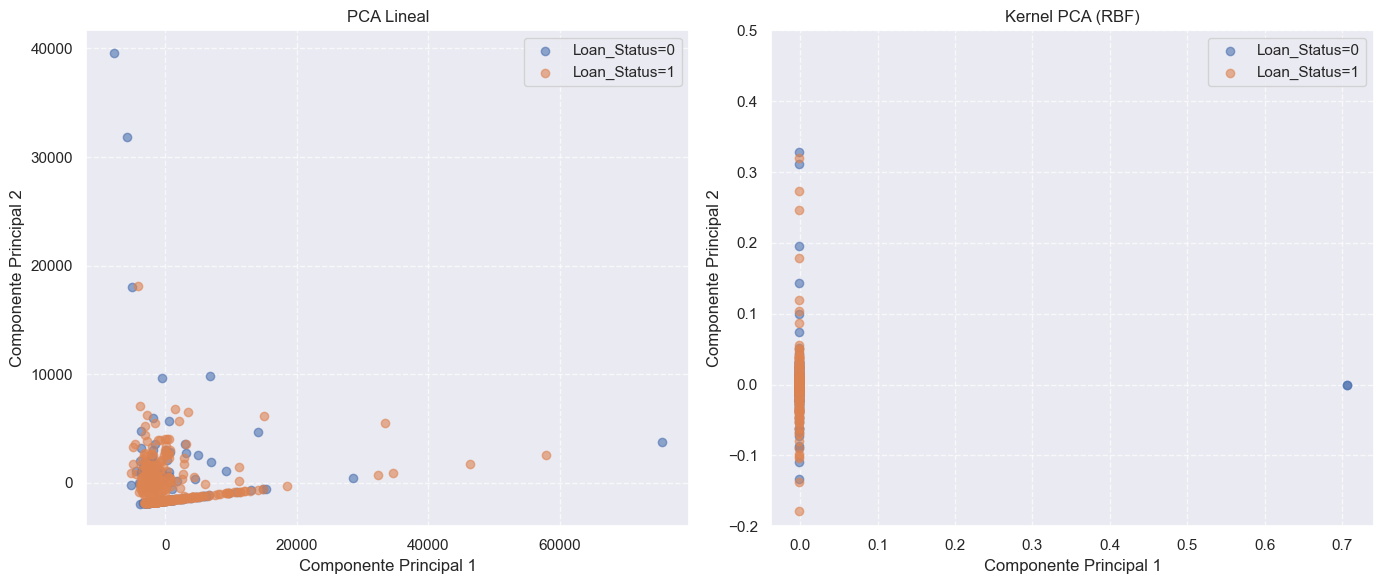

In [347]:
y = LabelEncoder().fit_transform(df['Loan_Status'])
X = df.drop('Loan_Status', axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

for status, color in zip([0, 1], ['red', 'blue']):
    axes[0].scatter(X_pca[y==status, 0], X_pca[y==status, 1],
                    label=f'Loan_Status={status}', alpha=0.6)
axes[0].set_title('PCA Lineal')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

for status, color in zip([0, 1], ['red', 'blue']):
    axes[1].scatter(X_kpca[y==status, 0], X_kpca[y==status, 1],
                    label=f'Loan_Status={status}', alpha=0.6)
axes[1].set_title('Kernel PCA (RBF)')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].set_ylim(-0.2, 0.5)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.10</p>

<p>PCA y kernel PCA</p>

Como puedes observar, Kernel-PCA nos ha proporcionado una mejor separación. La PCA normal no pudo transformar eficientemente los datos no lineales en una forma lineal.

Dado que el PCA es una técnica ampliamente utilizada tanto para EDA como para la reducción de características, he creado un proyecto más elaborado para ilustrar su uso.

## PCA en un Conjunto de Datos Multicolumna Grande

El proyecto que voy a describir ahora utiliza un conjunto de datos con 64 características y un objetivo. Con 64 columnas, el EDA sobre este conjunto de datos sería complicado. Aplicaremos PCA para ver si podemos obtener alguna visualización después de reducir el conjunto de datos a dos o tres dimensiones. También reduciremos el conjunto de datos a diferentes dimensiones que van de 10 a 60 en pasos de 10, para observar cómo se ve afectado el rendimiento del modelo.

#### Sobre el Conjunto de Datos

Voy a describir brevemente el [conjunto de datos](https://www.kaggle.com/datasets/kyr7plus/emg-4) para que estés mejor preparado para interpretar los resultados. El conjunto de datos contiene mediciones de gestos de mano. Estas mediciones se toman mediante un procedimiento diagnóstico médico llamado electromiografía (EMG).

El conjunto de datos tiene aproximadamente 11,000 instancias, almacenadas en cuatro archivos CSV. El conjunto de datos está bien balanceado y no contiene valores nulos. La Figura 2.11 muestra la distribución de datos para las cuatro clases que contiene.

In [348]:

allFiles = ['data_0.csv','data_1.csv','data_2.csv','data_3.csv']
classes = [0, 1, 2, 3] 

list_df = []
for file, cls in zip(allFiles, classes):
    read = pd.read_csv(file, header=None)
    read['label'] = cls  # add a column with the class
    list_df.append(read)

df = pd.concat(list_df, ignore_index=True)

print(df.shape)
print(df.head())


(11678, 66)
      0    1    2    3     4     5      6     7     8    9  ...    56   57  \
0  26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ...  61.0  4.0   
1 -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ...  47.0  6.0   
2 -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ...   7.0  7.0   
3   2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -11.0  4.0   
4   6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ... -35.0 -8.0   

    58    59    60    61     62    63  64  label  
0  8.0   5.0   4.0  -7.0  -59.0  16.0   0      0  
1  6.0   5.0  13.0  21.0  111.0  15.0   0      0  
2  1.0  -8.0   7.0  21.0  114.0  48.0   0      0  
3  7.0  11.0  33.0  39.0  119.0  43.0   0      0  
4  2.0   6.0 -13.0 -24.0 -112.0 -69.0   0      0  

[5 rows x 66 columns]


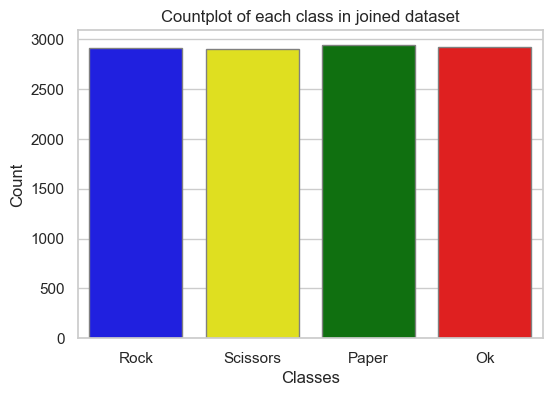

In [349]:
class_names = ['Rock', 'Scissors', 'Paper', 'Ok']
colors = ['blue', 'yellow', 'green', 'red']

counts = [len(pd.read_csv(f, header=None)) for f in allFiles]

sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x=class_names, y=counts, palette=colors, edgecolor='gray')
plt.title('Countplot of each class in joined dataset')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.11</p>

<p>Distribución de clases en el conjunto de datos de gestos con las manos.</p>

### Cargando el Conjunto de Datos

Como los datos se proporcionan en cuatro archivos diferentes, después de leerlos, necesitarás combinar los resultados. Sobre el conjunto combinado, extraerás las características y el objetivo. Luego, crearás los conjuntos de datos de entrenamiento y prueba.

Puedes consultar [la fuente](https://github.com/profsarang/ThinkingDataScience/blob/main/Ch02/PCA%20Hand%20Gesture%20Prediction.ipynb) del proyecto para obtener más detalles sobre este proceso.

In [350]:
def read_data():
    print(allFiles)
    list = []
    for file in allFiles:
        read = pd.read_csv(file, header = None)
        list.append(read)
    df = pd.concat(list)
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)
    return Xtrain, Xtest, Ytrain, Ytest, X, Y

In [351]:
X_train, X_test, y_train, y_test, X, Y = read_data()

['data_0.csv', 'data_1.csv', 'data_2.csv', 'data_3.csv']


In [352]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9926, 64), (1752, 64), (9926,), (1752,))

In [353]:
X.shape, Y.shape

((11678, 64), (11678,))

In [354]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [355]:
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [356]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

### Construcción del Modelo

Como se mencionó anteriormente, voy a reducir las dimensiones del conjunto de datos de 64 a varios valores y luego verificar la precisión del modelo en los conjuntos de datos reducidos. Para referencia, necesitamos conocer la precisión del modelo en el conjunto completo. Usaré el clasificador _CatBoost_ para la construcción del modelo. Aplicaremos el mismo algoritmo en los conjuntos de datos reducidos y compararemos sus resultados con esta referencia del conjunto completo. El siguiente código aplica el clasificador _CatBoost_ en nuestro conjunto de datos previamente preparado:

In [357]:
# !pip install catboost

In [358]:
from catboost import Pool, CatBoostClassifier

model = CatBoostClassifier(iterations=300,
    learning_rate=0.7,
    random_seed=42,
    depth=5)

model.fit(X_train_scaled, y_train,
    cat_features=None,
    eval_set=(X_test_scaled, y_test),
    verbose=False)


In [359]:
prediction=model.predict(X_test_scaled)

Después de entrenar el modelo, revisa el informe de clasificación, que se muestra en la Fig. 2.12.
Usaremos los resultados anteriores como referencia al comparar los resultados de PCA.

In [360]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       438
           1       0.95      0.98      0.97       448
           2       0.95      0.94      0.95       412
           3       0.93      0.91      0.92       454

    accuracy                           0.95      1752
   macro avg       0.95      0.95      0.95      1752
weighted avg       0.95      0.95      0.95      1752



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.12</p>

<p>Reporte de Clasificaciones.</p>

### PCA para Visualización

Primero, intentaremos visualizar el efecto de las características sobre la variable objetivo. Más adelante, estudiaremos el efecto de reducir el número de características sobre la precisión del modelo.
Como hay 64 columnas, no podemos generar un gráfico de 64 dimensiones. Por lo tanto, primero reducimos las dimensiones a dos, para crear un gráfico en 2-D. Reducimos las dimensiones de 64 a 2 utilizando el siguiente código:

In [361]:
PCA1=PCA(n_components=2)
PCA1=PCA1.fit(X)

Ahora, ¿cómo sabemos si los datos reducidos representan correctamente nuestro conjunto de datos original?
Para comprobarlo, revisamos la proporción de varianza explicada con el siguiente comando:

In [362]:
PCA1.explained_variance_ratio_

array([0.07220325, 0.07008469])

La proporción de varianza explicada es una métrica que indica el porcentaje de varianza que aporta cada uno de los componentes reducidos. En otras palabras, muestra qué tan bien los nuevos componentes representan el conjunto de datos original.
Los valores del resultado anterior son demasiado bajos y, obviamente, no pueden representar nuestro conjunto de datos para visualización. Aun así, aplicaremos PCA a nuestro conjunto de datos y estudiaremos la varianza de cada punto de datos con el siguiente código:

La figura 2.13 muestra una salida parcial de los valores de varianza para los dos componentes.

In [363]:
PCA1=PCA1.fit_transform(X)
PCA_df=pd.DataFrame(PCA1, columns = [
'Componente Principal 1',
'Componente Principal 2'])
PCA_df

,Componente Principal 1,Componente Principal 2
0,47.499686,-56.973160
1,127.908488,-130.072952
2,65.916661,0.746392
3,82.765909,-48.185994
4,-108.170684,114.755321
...,...,...
11673,8.306669,39.418770
11674,-11.823803,46.886819
11675,-29.678079,53.036751
11676,27.828088,46.890206


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.13</p>

<p>Valores de varianza para dos componentes principales.</p>


La figura 2.14 muestra la distribución de cuatro valores objetivo para todo el rango de Componentes principales representados en una escala logarítmica.

In [364]:
PCA_df = pd.concat([PCA_df, pd.DataFrame(Y, columns=['label'])], axis = 1)
PCA_df.head()

,Componente Principal 1,Componente Principal 2,label
0,47.499686,-56.973160,0
1,127.908488,-130.072952,0
2,65.916661,0.746392,0
3,82.765909,-48.185994,0
4,-108.170684,114.755321,0


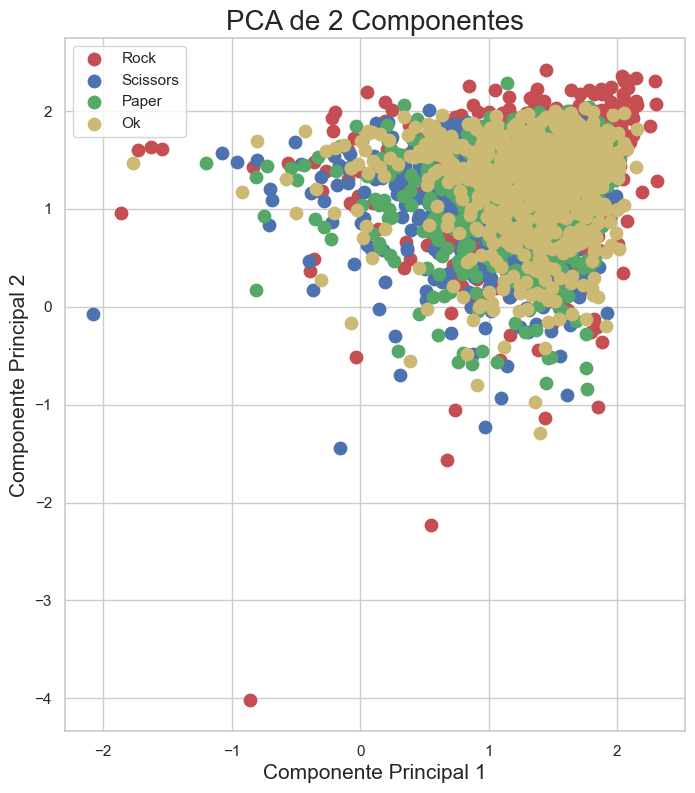

In [365]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Y = Y.ravel() if hasattr(Y, 'ravel') else Y

PCA_df = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
PCA_df['label'] = Y 

PCA_df['label'] = PCA_df['label'].replace({0:'Rock', 1:'Scissors', 2:'Paper', 3:'Ok'})

fig, ax = plt.subplots(figsize=(8,9))
targets = ['Rock', 'Scissors', 'Paper', 'Ok']
colors = ['r', 'b', 'g', 'y']

for target, color in zip(targets, colors):
    indicesToKeep = (PCA_df['label'] == target)
    ax.scatter(np.log10(PCA_df.loc[indicesToKeep, 'Componente Principal 1']),
               np.log10(PCA_df.loc[indicesToKeep, 'Componente Principal 2']),
               color=color,
               s=80)

ax.set_xlabel('Componente Principal 1', fontsize=15)
ax.set_ylabel('Componente Principal 2', fontsize=15)
ax.set_title('PCA de 2 Componentes', fontsize=20)
ax.legend(targets)
ax.grid(True)
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.14</p>

<p>PCA de Dos Componentes.</p>

Como se puede ver, la agrupación no es tan significativa. Ahora intentemos reducir el conjunto de datos a tres dimensiones para su visualización. Se reduce el conjunto de datos a tres dimensiones cambiando el valor del parámetro de entrada en la llamada al método PCA:

In [366]:
PCA2=PCA(n_components=3)
PCA2_df=PCA2.fit(X)


Puedes comprobar la relación de varianza explicada como antes:

In [367]:
PCA2_df.explained_variance_ratio_


array([0.07220325, 0.07008469, 0.06072792])

In [368]:
PCA2_df.explained_variance_ratio_.sum()

np.float64(0.20301586585440054)

Nuevamente, esta ciertamente no es una buena representación de nuestro conjunto de datos original. El 3-D El gráfico generado en el conjunto de datos reducido se muestra en la Figura 2.15.

In [369]:
PCA2=PCA2.fit_transform(X)
PCA2_df=pd.DataFrame(PCA2, columns = ['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
PCA2_df=np.log10(PCA2_df)

In [370]:
PCA2_df = pd.concat([PCA2_df, pd.DataFrame(Y, columns=['label'])], axis = 1)
PCA2_df['label']=PCA2_df['label'].replace(0,'Roca').replace(1,'Tijeras').replace(2,'Papel').replace(3,'Ok')

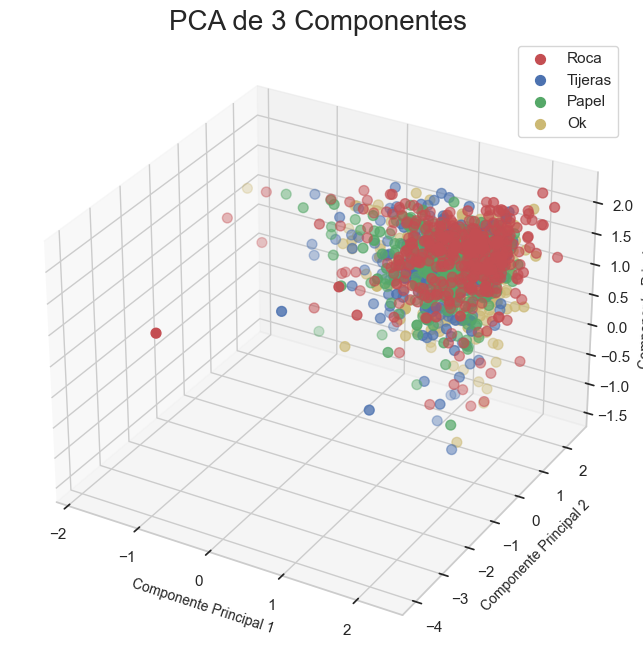

In [371]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Componente Principal 1', fontsize = 10)
ax.set_ylabel('Componente Principal 2', fontsize = 10)
ax.set_zlabel('Componente Principal 3', fontsize = 10)
ax.set_title('PCA de 3 Componentes', fontsize = 20)
targets = ['Roca', 'Tijeras', 'Papel', 'Ok']
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = (PCA2_df['label'] == target)
    ax.scatter(PCA2_df.loc[indicesToKeep, 'Componente Principal 1']
               , PCA2_df.loc[indicesToKeep, 'Componente Principal 2']
               , PCA2_df.loc[indicesToKeep, 'Componente Principal 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.15</p>

<p>PCA de Tres Componentes.</p>

Estas visualizaciones en 2-D y 3-D no nos han ayudado mucho en este caso. Aplica la técnica que has aprendido aquí en tus otros conjuntos de datos, y es posible que obtengas una mejor visualización en esos casos. Los científicos de datos suelen usar técnicas de PCA para reducir los conjuntos de datos a dimensiones más bajas con fines de visualización.

### PCA para la Construcción de Modelos

Ahora utilizaremos la técnica de PCA para la construcción de modelos. Reduciremos nuestro conjunto de datos de 64 a 30 dimensiones. Usamos un código similar al anterior, ajustando el valor del número de componentes a 30.

La Figura 2.16 muestra la salida parcial de la varianza de las características.

In [372]:
features = 30
PCA3=PCA(n_components = features)
PCA3=PCA3.fit_transform(X)
PCA3=pd.DataFrame(PCA3)
PCA3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,47.499686,-56.973160,27.877994,-11.406395,116.625955,-48.079092,-88.601532,-6.704974,-70.726762,-32.153064,...,8.603421,-25.679450,41.585910,18.857499,-14.118372,-59.186125,-40.756375,-59.081863,-19.753976,-19.994386
1,127.908488,-130.072952,12.035903,7.047318,51.953202,-116.549925,-15.915025,68.820383,49.804302,5.625435,...,-7.391896,1.417258,-10.485240,-13.293716,24.080270,39.780184,-10.075524,19.656155,2.580497,12.062594
2,65.916661,0.746392,-161.220857,17.376604,-90.916976,-92.562738,36.146587,-70.237049,157.596983,-16.573157,...,-7.816211,-9.985651,46.063441,32.365699,-4.244594,-15.541273,-32.253283,-17.016840,-17.568844,-18.915451
3,82.765909,-48.185994,-33.912899,-59.648623,-57.325071,-99.767523,102.987038,75.761085,50.473223,37.876649,...,-30.717446,20.056230,9.090273,-27.431731,8.934993,-29.847975,22.329379,-21.698809,-6.885182,1.269932
4,-108.170684,114.755321,57.269129,76.256754,-7.677620,145.006214,6.951964,-57.979826,-49.678755,27.110406,...,-4.408702,13.882495,33.947315,3.628009,16.588612,7.633390,-33.888906,-30.338015,-16.071507,-18.116473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,8.306669,39.418770,18.208648,28.554445,0.410885,-11.736908,-35.671035,12.613118,3.427695,27.301943,...,6.243948,7.311291,-0.721223,-15.534135,9.612539,-12.663635,-21.339339,14.112677,-9.350264,-29.405668
11674,-11.823803,46.886819,-55.916331,-10.956785,-42.286231,13.389354,-60.347704,0.744627,-21.456322,19.960053,...,2.816327,-2.790088,4.789902,-19.182233,8.745484,8.930614,4.389414,-1.144162,-4.337691,12.513474
11675,-29.678079,53.036751,36.854563,-13.069277,-9.245888,-20.268848,3.909075,31.836322,13.884481,23.952560,...,-4.067236,1.945087,3.154505,9.162978,3.270121,17.187122,0.173067,16.012087,-1.854149,1.459499
11676,27.828088,46.890206,14.290434,-17.811578,-48.674160,-30.450952,-67.991974,-20.005159,-0.735755,63.689083,...,3.170620,5.685736,12.341922,7.296771,0.644011,5.381080,11.193063,-15.432510,-10.164119,12.655135


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.16</p>

<p>Valores de varianza para diferentes características.</p>

Como puede verse, hay mucha variación entre los puntos de datos; algunos presentan una varianza baja y otros una alta.
Tras preparar los conjuntos de entrenamiento y prueba como se hizo anteriormente, aplicamos el clasificador CatBoost sobre este conjunto de datos reducido.

In [373]:
df_pca = pd.concat([PCA3, pd.DataFrame(Y, columns=['label'])], axis = 1)
df_pca.shape

(11678, 31)

In [374]:
PCA3=PCA(n_components=features)
PCA3.fit(X)
PCA3.explained_variance_ratio_.sum()

np.float64(0.8677542808839088)

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_val, label_train, label_val = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size=0.15, random_state=42)
     

In [376]:
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((9926, 30), (9926,), (1752, 30), (1752,))

In [377]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

In [378]:
model_pca = CatBoostClassifier(iterations=300,
    learning_rate=0.7,
    random_seed=42,
    depth=5)
model_pca.fit(X_train_scaled, label_train,
    cat_features=None,
    eval_set=(X_val_scaled, label_val),
    verbose=False)

Comprobamos la puntuación de precisión del modelo:

In [379]:
prediction_pca=model_pca.predict(X_val_scaled)
model_pca.score(X_val_scaled, label_val)

np.float64(0.827054794520548)

Esta es una precisión bastante buena considerando que hemos reducido las características en
más del 50%. El informe de clasificación de nuestro nuevo modelo se muestra en la Fig. 2.17.

In [380]:

print(classification_report(label_val, prediction_pca))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       449
           1       0.80      0.86      0.83       444
           2       0.78      0.74      0.76       437
           3       0.76      0.77      0.76       422

    accuracy                           0.83      1752
   macro avg       0.83      0.83      0.83      1752
weighted avg       0.83      0.83      0.83      1752



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.17</p>

<p>Informe de clasificación del modelo revisado.</p>

Compare esto con nuestro informe de clasificación sobre el conjunto de datos completo, que podemos considerar comparable, y podemos adaptar fácilmente el conjunto de datos reducido para nuestro modelo.
Se puede experimentar además reduciendo las dimensiones a distintos tamaños entre 5 y 60, como se muestra aquí:

In [381]:
pca_list = []

for n in [5, 10, 20, 30, 40, 50, 60]:
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    pca_list.append(
        PCAmod.explained_variance_ratio_.sum())

Puede imprimir la métrica de varianza explicada de la siguiente manera:

In [382]:
pd.DataFrame(pca_list,index=[[5, 10, 20, 30, 40, 50, 60]],columns=['Varianza explicada'])

,Varianza explicada
5,0.310864
10,0.518272
20,0.746589
30,0.867754
40,0.942358
50,0.982708
60,0.998243


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.18</p>

<p>Matriz de salida de la varianza explicada.</p>

Como puedes ver, para valores mayores de dimensiones, digamos 30 o más, la varianza es aceptable. Es decir, los conjuntos de datos reducidos se parecen en su mayoría al original.
También puedes verificar la precisión del modelo con los distintos tamaños de conjunto de datos:

In [383]:
accuracies = []
for n in [5, 10, 20, 30, 40, 50, 60]:
        PCAmod = PCA(n_components=n)
        PCAmod = PCAmod.fit_transform(X)
        PCAmod = pd.DataFrame(PCAmod)
        df_pca = pd.concat([PCAmod, pd.DataFrame(Y, columns=['label'])], axis = 1)

        X_train, X_val, label_train, label_val = train_test_split(
                df_pca.iloc[:,:-1],
                df_pca.iloc[:,-1], 
                test_size=0.15,
                random_state=42
                )
        X_train_scaled = s.fit_transform(X_train)
        X_val_scaled = s.transform(X_val)

        model_pca.fit(
                X_train_scaled, 
                label_train,cat_features=None, 
                eval_set=(X_val_scaled,label_val), 
                verbose=False
                )

        accuracies.append(model_pca.score(X_val_scaled,label_val))

Imprime la métrica de precisión, la figura 2.19 enseña el resultado:

In [384]:
pd.DataFrame(accuracies,index=[[5, 10, 20, 30, 40, 50, 60]],columns=['accuracy'])

,accuracy
5,0.429224
10,0.597603
20,0.696918
30,0.827055
40,0.881849
50,0.901256
60,0.912671


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.19</p>

<p>Matriz de Precisión.</p>

Como se observa, por encima de 30 componentes, la puntuación de exactitud del modelo es del 80% o más. Incluso si consideramos el conjunto de datos reducido a 40 características, que ofrece una exactitud del 86,75%, se trata de una reducción considerable del tamaño del conjunto de datos, pasando de 64 a 40 columnas. Cabe destacar que el conjunto de datos completo había dado una puntuación de exactitud del 95,14%. En definitiva, PCA es una técnica poderosa que los científicos de datos utilizan ampliamente tanto para visualizaciones de datos como para la construcción de modelos.

# Usamos el Anterior Dataset

In [385]:
df = pd.read_csv("Dataset.csv")
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

a = df.isnull().sum()/len(df)
variables = df.columns[:-1]
variable = []
for i in range(0,len(df.columns[:-1])):
    if a[i]>0.03: # umbral en 3%
        variable.append(variables[i])

df['LoanAmount'].fillna(
    df['LoanAmount'].median(),
    inplace=True)
df['Loan_Amount_Term'].fillna(
    df['Loan_Amount_Term'].mode()[0],
    inplace=True)
df['Credit_History'].fillna(
    df['Credit_History'].mode()[0],
    inplace=True)

label_encoder = LabelEncoder()
columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for i in columns:
  df[i]= label_encoder.fit_transform(df[i])

df = df.copy()
columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'Loan_ID']

for col in columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

print(variances)

Gender               1.778751e-01
Married              2.351972e-01
Dependents           1.255589e+00
Education            1.708902e-01
Self_Employed        2.859435e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.151048e+03
Credit_History       1.241425e-01
Property_Area        6.201280e-01
Loan_Status          2.152707e-01
dtype: float64


## Análisis de Componentes Independientes

El análisis de componentes independientes (ICA) es una técnica estadística bien conocida para detectar factores ocultos, como variables, señales o mediciones en un conjunto de datos. Al igual que PCA, divide las señales multivariantes en subcomponentes. Se asume que los componentes tienen una distribución no gaussiana y son independientes entre sí. Por ejemplo, en ingeniería de sonido, se utiliza para determinar las fuentes de las señales de audio. Herault y Jutten inventaron la técnica en 1986 para resolver el problema BSS (separación ciega de fuentes) en el procesamiento de señales. ICA es más agresivo que PCA en la detección de subcomponentes independientes y probablemente más preciso que PCA.

La librería _sklearn_ implementa ICA a través de _sklearn.decomposition.FastICA_. Esta es la forma en que se aplica a nuestro conjunto de datos:

In [386]:
from sklearn.decomposition import FastICA

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

ica = FastICA(n_components=2, 
              max_iter=500, 
              random_state=1000)
fast_ica=ica.fit_transform(X)

In [387]:
fast_ica

array([[-0.0448828 , -0.55276283],
       [ 0.13704447, -0.04789707],
       [ 0.42409747, -0.58381977],
       ...,
       [-0.41513571, -0.44579233],
       [-0.33035189, -0.53380421],
       [ 0.16346814, -0.56647734]])

Después de las reducciones, se muestra el gráfico generado para el análisis de dos componentes
en la figura 2.20.

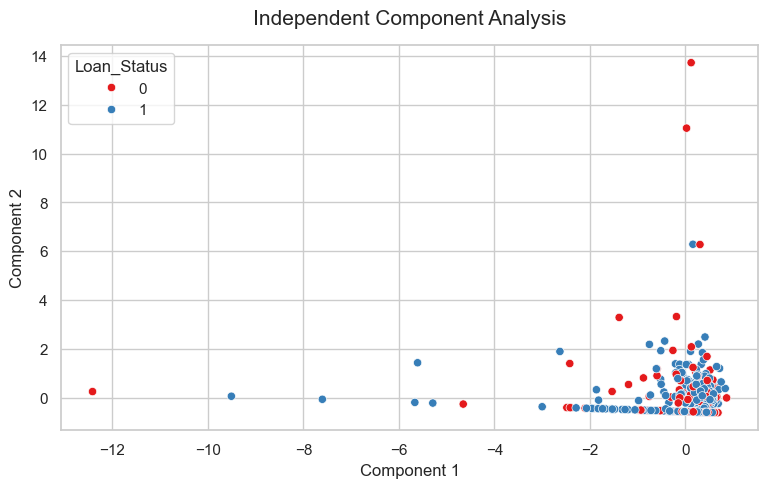

In [388]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=fast_ica[:, 0], y=fast_ica[:, 1], hue=y, palette='Set1')
plt.title("Independent Component Analysis", fontsize=15, pad=15)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)

plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.20</p>

<p>Análisis de componentes independientes</p>

## Isometric Mapping

Este método realiza la reducción no lineal de la dimensionalidad mediante mapeo isométrico. Amplía el PCA con kernel. Usamos la distancia geodésica a los vecinos más cercanos para conectar las instancias. Se especifica el número de vecinos como un hiperparámetro para Isomap. El siguiente fragmento de código muestra cómo usarlo.

La figura 2.21 muestra la tabla isométrica después de la separación de componentes.

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

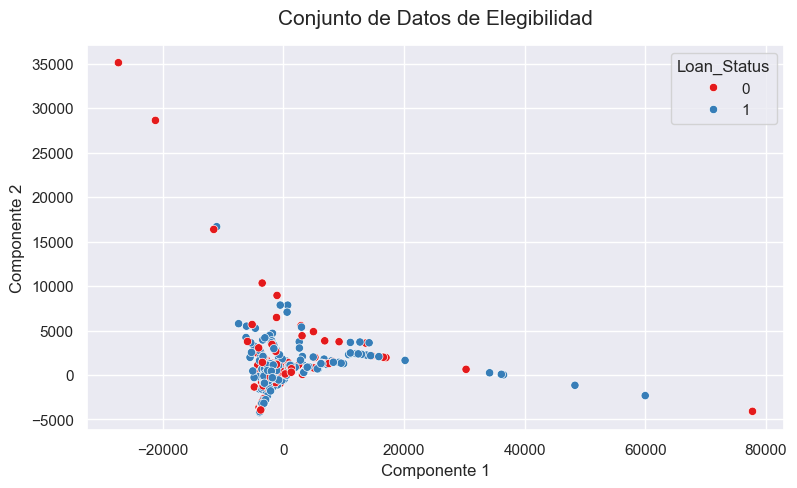

In [390]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.scatterplot(x=X_isomap[:,0], y=X_isomap[:,1], hue=y, palette='Set1')
plt.title("Conjunto de Datos de Elegibilidad", fontsize=15, pad=15)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.21</p>

<p>Cuadro isométrico del conjunto de datos de elegibilidad de préstamos.</p>

## Incrustación Estocástica de Vecinos t-Distribuida (t-SNE)

Esta es otra técnica de reducción no lineal de la dimensionalidad, ampliamente utilizada en visualización de datos, procesamiento de imágenes y PLN. Si el número de características es superior a 50, recomiendo primero usar PCA o SVD truncada en tu conjunto de datos. El siguiente fragmento de código muestra su uso:

In [391]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

sc = StandardScaler()
pca = PCA()
tsne = TSNE()
tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_tsne = tsne_after_pca.fit_transform(X)

El resultado producido después de aplicar la transformación t-SNE se muestra en la Fig. 2.22.

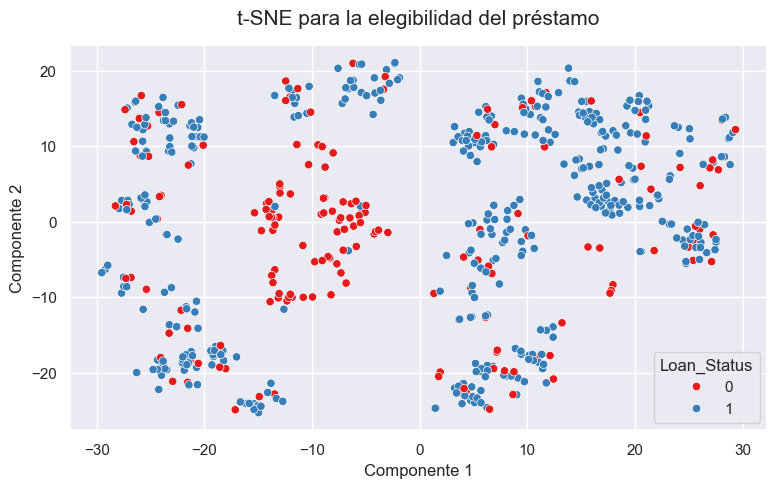

In [392]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE para la elegibilidad del préstamo", fontsize=15, pad=15)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.22</p>

<p>Parcela T-SNE para la elegibilidad del préstamo.</p>

## UMAP

UMAP (Aproximación y Proyección Uniforme de Variedades) es una técnica de aprendizaje de variedades que compite con t-SNE en calidad de visualización. Durante la reducción de dimensionalidad, preserva más de la estructura global en comparación con t-SNE y ofrece un mejor rendimiento en tiempo de ejecución. Es escalable a dimensiones muy grandes, lo que lo hace más adecuado para datos del mundo real.

El método utiliza el concepto de k-vecinos más cercanos y descenso de gradiente estocástico (SGD) para la optimización. Calcula las distancias en el espacio de alta dimensión, las proyecta al espacio de baja dimensión, vuelve a calcular las distancias en este espacio de baja dimensión y, finalmente, utiliza descenso de gradiente estocástico para minimizar las diferencias entre estas distancias.

La biblioteca sklearn proporciona la implementación de UMAP, por lo que puedes considerarlo como un reemplazo directo de t-SNE. La visualización se crea llamando a la función UMAP:

In [393]:
mapper = umap.UMAP(n_neighbors=5,
    min_dist=0.3,
    metric='correlation').fit(X)
umap.plot.points(mapper, labels=y)

NameError: name 'umap' is not defined

El gráfico generado se muestra en la figura 2.23

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.23</p>

<p>Gráfico UMAP.</p>

Compara el resultado anterior con el mapa de correlación generado por t-SNE y te darás
cuenta de que UMAP ha producido mejores resultados.

## Descomposición en Valores Singulares (Singular Value Decomposition)


Matemáticamente, la descomposición en valores singulares significa la factorización de cualquier matriz (m × n) en una matriz unitaria U (m × m), una matriz diagonal Σ (m × n) y una matriz unitaria V (n × n). Se expresa como:

M = U Σ V*

donde U es una matriz unitaria de m × m, Σ es una matriz diagonal de m × n, y V es una matriz unitaria de n × n, siendo V* la transpuesta conjugada de V.

La descomposición en valores singulares (SVD) es un método popular de reducción de dimensionalidad que funciona mucho mejor con datos dispersos. Un caso típico de datos dispersos es la recopilación de calificaciones de usuarios en un sitio de comercio electrónico. Muchas veces, el usuario deja esta columna en blanco mientras proporciona su reseña.

La biblioteca `sklearn` proporciona su implementación en la clase `sklearn.decomposition.TruncatedSVD`. Esta clase toma solo algunos argumentos, como el número de componentes, el algoritmo solucionador a usar, el número de iteraciones y otros. La SVD se aplica usando el siguiente código:

In [ ]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv("train.csv")
df1= df1.drop('Loan_ID', axis=1)
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

label_encoder = LabelEncoder()
columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for i in columns:
  df1[i]= label_encoder.fit_transform(df1[i])

print(df1)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
df1_filled = df.copy()
df1_filled.fillna(df1_filled.median(numeric_only=True), inplace=True)
for col in df1_filled.select_dtypes(include='object').columns:
    df1_filled[col].fillna(df1_filled[col].mode()[0], inplace=True)

X = df1_filled.drop('Loan_Status', axis=1).to_numpy()
y = df1_filled['Loan_Status'].to_numpy()

print(X.shape, y.shape)


(614, 11) (614,)


In [ ]:
X = X[:613]
y = y[:613]
print(X.shape, y.shape) 


(613, 11) (613,)


In [ ]:
def get_models():
	models = dict()
	for i in range(1,11):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

Para evaluar el desempeño del modelo, definimos una función de la siguiente manera que utiliza
estrategia de validación cruzada:

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10,
        n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y,
        scoring='accuracy', cv=cv, n_jobs=-1,
        error_score='raise')
    return scores

Ahora evaluamos todos los modelos en el rango especificado e imprimimos la media y el
desviación estándar de las puntuaciones individuales:

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.688 (0.004)
>2 0.691 (0.009)
>3 0.690 (0.008)
>4 0.689 (0.007)
>5 0.688 (0.008)
>6 0.688 (0.007)
>7 0.687 (0.007)
>8 0.686 (0.019)
>9 0.684 (0.029)
>10 0.782 (0.042)


También puede generar el gráfico de precisión en función del número de componentes. Dicho gráfico se muestra en la Fig. 2.24.

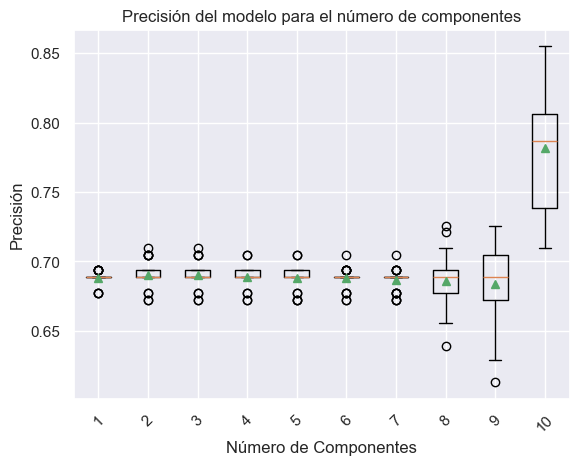

In [ ]:
plt.xlabel('Número de Componentes')
plt.ylabel('Precisión')
plt.title('Precisión del modelo para el número de componentes')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.24</p>

<p>Precisión contra número de componentes.</p>

Como se puede observar, la precisión es mayor cuando el número de características es alto; sin embargo, la desviación estándar también ha aumentado, lo cual no es deseable. Para siete componentes, probablemente exista un equilibrio, con una precisión alrededor de 0.69 y una desviación estándar relativamente baja. Del mismo modo, puede usar la salida de su SVD para decidir el tamaño apropiado de las dimensiones en su conjunto de datos.

## Análisis Discriminante Lineal (LDA)


Fisher introdujo el LDA en 1936 para dos clases. En 1948, C. R. Rao lo generalizó para múltiples clases. LDA proyecta los datos a dimensiones más bajas, asegurando que la variabilidad entre las clases se maximice y que dentro de la clase se reduzca.  

LDA se utiliza para clasificación, reducción de dimensionalidad y visualizaciones. Es comúnmente usado para extracción de características en problemas de clasificación de patrones y ha superado a PCA en visualizaciones 2-D y 3-D. También se usa en visión por computadora, específicamente en algoritmos de detección facial.  

La biblioteca sklearn proporciona la implementación de LDA en la clase `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`. A continuación, se muestra su uso con un ejemplo trivial. Usaremos el conjunto de datos `digits` proporcionado por sklearn, que tiene diez componentes. Utilizando el algoritmo LDA, reduciremos este número entre 2 y 9. Aplicamos el algoritmo con la siguiente instrucción:

In [ ]:
# lda = LinearDiscriminantAnalysis(n_components=comps)
#  lda.fit(X_train, y_train)

El algoritmo ajustará nuestro conjunto de datos de entrenamiento al número especificado de componentes. Luego aplicaremos el clasificador de Random Forest sobre el conjunto de datos transformado utilizando el siguiente fragmento de código:

In [ ]:
# classifier = RandomForestClassifier(random_state=1, max_depth=10)
# classifier.fit(lda.transform(X_train), y_train)

Comprobaremos la puntuación de precisión en el conjunto de datos de prueba utilizando la declaración:

In [ ]:
# y_pred = classifier.predict(lda.transform(X_test))
# accuracies.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

dim = len(X[0])
n_classes = len(np.unique(y))

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

accuracies=[]
auc=[]
for comps in range(2,n_classes):
  lda = LinearDiscriminantAnalysis(n_components=comps)
  lda.fit(X_train, y_train)
  classifier = RandomForestClassifier(random_state=1, max_depth=10)
  classifier.fit(lda.transform(X_train), y_train)
  y_pred = classifier.predict(lda.transform(X_test))
  accuracies.append(metrics.accuracy_score(y_test,y_pred))

Finalmente, trazaremos la precisión para el número de componentes que probamos en el rango de 2 a 9. El gráfico de rendimiento del clasificador se muestra en la Fig. 2.25.  


Text(0.5, 1.0, 'Performance of classifier with LDA')

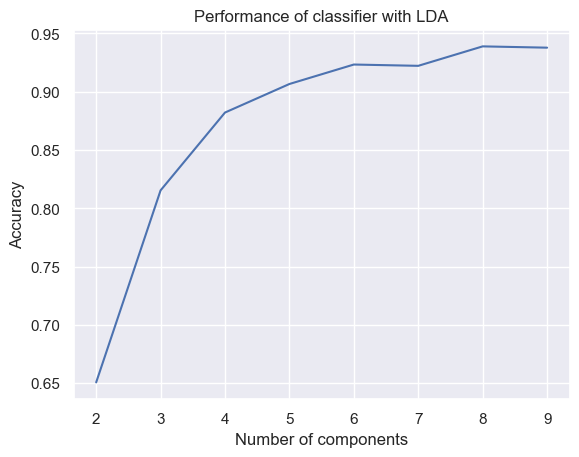

In [ ]:

plt.plot(range(2,10), accuracies)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Performance of classifier with LDA')

     

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 2.25</p>

<p>Gráfico de rendimiento de LDA.</p>

A partir del gráfico, observamos claramente que la precisión aumenta a medida que agregamos más características hasta que alcanza un valor cercano a 8. La precisión para 8 y 10 componentes (el conjunto completo) prácticamente se mantiene igual. Por lo tanto, hemos logrado reducir las características de 10 a 8.  

Observando el gráfico, donde la precisión es aproximadamente 0.90 para un número de componentes de 5, podemos decidir reducir las características a 5. ¿Ves el poder del algoritmo LDA? Para conjuntos de datos con dimensiones muy altas, esta es una técnica muy eficaz para reducir las dimensiones del conjunto de datos.

## Resumen

Aunque tener muchas características para análisis y construcción de modelos de machine learning es una ventaja, también lo consideramos un inconveniente serio. A esto se le llama la **maldición de la dimensionalidad**. Un mayor número de dimensiones hace que las visualizaciones de datos sean difíciles; los seres humanos probablemente solo podemos comprender gráficos en 2-D y 3-D. 

Un gran número de dimensiones también aumenta los requerimientos de recursos y tiempo para construir modelos. Tener más dimensiones no siempre significa que construiremos mejores modelos. Muchas veces, dos o más características pueden aportar información similar, y en esos casos tiene poco sentido incluirlas todas en el conjunto de datos.  

En este capítulo, se estudiaron varias técnicas de reducción de dimensionalidad. Algunas eran elementales y requerían inspecciones manuales del conjunto de datos. Técnicas como PCA realizan reducciones automáticas y además generan un informe sobre qué tan cercano está el conjunto de datos reducido al original.  

En muchas situaciones, y para técnicas avanzadas, se observó que a veces se puede reducir las dimensiones hasta un 50% o más. Muchos científicos de datos utilizan estas técnicas para visualizar sus conjuntos de datos y crear pipelines de construcción de modelos más eficientes.  
En el próximo capítulo comenzará el estudio de diferentes algoritmos clásicos.